# **Descriptive Statistics for Stock Markets Returns**


## **Data preparation**

In [ ]:
%%capture
!pip install arch

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# for unit root testing
from arch.unitroot import (ADF, PhillipsPerron)

<div style="text-align: right">Returns are calculated according to $y_{t}=100\times\left[\log\left(p_{t}\right)-\log\left(p_{t-1}\right)\right]$. </div>

In [ ]:
# data collection
path = 'https://git.io/Jnovh'
series = pd.read_excel(path, sheet_name = 'source', index_col = 0)

# transformation to logarithmic returns
logret_series = (100 * (np.log(series) - np.log(series.shift(1))))

# save logret_series dataframe
logret_series.to_excel("logret_series.xlsx")  

# output configuration
print('Daily Latam Stock Market Prices')
display(series.head())
print('')
print('Daily Latam Stock Market Returns')
display(logret_series.head())
display(logret_series.tail())

Daily Latam Stock Market Prices


,MERVAL,IBOV,IPSA,IGBC,MEXBOL,SPBLPGPT
Dates,,,,,,
1990-08-08,NaN,NaN,92.18,NaN,NaN,NaN
1990-08-09,NaN,NaN,92.10,NaN,NaN,NaN
1990-08-10,NaN,NaN,93.28,NaN,NaN,NaN
1990-08-13,NaN,NaN,93.51,NaN,NaN,NaN
1990-08-14,NaN,NaN,93.64,NaN,NaN,NaN



Daily Latam Stock Market Returns


,MERVAL,IBOV,IPSA,IGBC,MEXBOL,SPBLPGPT
Dates,,,,,,
1990-08-08,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-09,NaN,NaN,-0.086824,NaN,NaN,NaN
1990-08-10,NaN,NaN,1.273078,NaN,NaN,NaN
1990-08-13,NaN,NaN,0.246266,NaN,NaN,NaN
1990-08-14,NaN,NaN,0.138926,NaN,NaN,NaN


,MERVAL,IBOV,IPSA,IGBC,MEXBOL,SPBLPGPT
Dates,,,,,,
2021-05-25,0.000000,-0.845202,-0.592708,0.0,-1.283999,-0.550173
2021-05-26,0.668443,0.811011,0.682332,0.0,0.564790,-0.270503
2021-05-27,1.578564,0.303919,0.995259,0.0,1.062387,-1.196186
2021-05-28,2.936436,0.956123,2.339812,0.0,0.828329,5.239492
2021-05-31,0.094495,0.519747,2.267722,0.0,1.674938,0.122451


## **Descriptive Statistics for Stock Markets Returns**


In [ ]:
def descriptive_stats(ts):

  # the number of observations, standard deviation, minimum, maximum, skewness, 
  # kurtosis are selected for the table
  descriptive = pd.concat([ts.describe()\
                            .loc[['count', 'mean', 'std', 'min', 'max']].T, 
                            ts.skew().rename('skew'), ts.kurt().\
                            rename('kurt')], axis=1).round(2)
  descriptive['count'] = descriptive['count'].astype(int)


  # start date is added
  start_date = ts.apply(lambda ts: ts.first_valid_index())
  start_date = pd.DataFrame(start_date, columns=['Fecha Inicio'])

  # end date is added
  end_date = ts.apply(lambda ts: ts.last_valid_index())
  end_date = pd.DataFrame(end_date, columns=['Fecha Fin'])

  descriptive = pd.concat([start_date, end_date, descriptive], axis = 1)

  # output
  display(descriptive)
  print('')
  print('')
  print('Table in LaTeX')
  print('')
  print(descriptive.to_latex()) # LaTeX table creation

# function call for returns
print('Descriptive Statistics for Stock Markets Returns')
print('')
descriptive_stats(logret_series)

Descriptive Statistics for Stock Markets Returns



,Fecha Inicio,Fecha Fin,count,mean,std,min,max,skew,kurt
MERVAL,1991-12-26,2021-05-31,7678,0.06,2.30,-47.69,16.12,-1.43,27.93
IBOV,1995-03-16,2021-05-31,6838,0.05,1.97,-17.23,28.82,0.09,13.97
IPSA,1990-08-09,2021-05-31,8038,0.05,1.14,-15.22,11.80,-0.31,12.93
IGBC,2001-07-26,2021-05-31,5178,0.05,1.15,-11.05,14.69,-0.18,15.50
MEXBOL,1994-03-31,2021-05-31,7088,0.04,1.40,-14.31,12.15,0.03,7.51
SPBLPGPT,2002-02-07,2021-05-31,5038,0.06,1.34,-13.29,12.82,-0.57,12.89




Table in LaTeX

\begin{tabular}{lllrrrrrrr}
\toprule
{} & Fecha Inicio &  Fecha Fin &  count &  mean &   std &    min &    max &  skew &   kurt \\
\midrule
MERVAL   &   1991-12-26 & 2021-05-31 &   7678 &  0.06 &  2.30 & -47.69 &  16.12 & -1.43 &  27.93 \\
IBOV     &   1995-03-16 & 2021-05-31 &   6838 &  0.05 &  1.97 & -17.23 &  28.82 &  0.09 &  13.97 \\
IPSA     &   1990-08-09 & 2021-05-31 &   8038 &  0.05 &  1.14 & -15.22 &  11.80 & -0.31 &  12.93 \\
IGBC     &   2001-07-26 & 2021-05-31 &   5178 &  0.05 &  1.15 & -11.05 &  14.69 & -0.18 &  15.50 \\
MEXBOL   &   1994-03-31 & 2021-05-31 &   7088 &  0.04 &  1.40 & -14.31 &  12.15 &  0.03 &   7.51 \\
SPBLPGPT &   2002-02-07 & 2021-05-31 &   5038 &  0.06 &  1.34 & -13.29 &  12.82 & -0.57 &  12.89 \\
\bottomrule
\end{tabular}



## **Daily Latam Stock Market Returns Figure**

Daily Latam Stock Market Returns Figure.


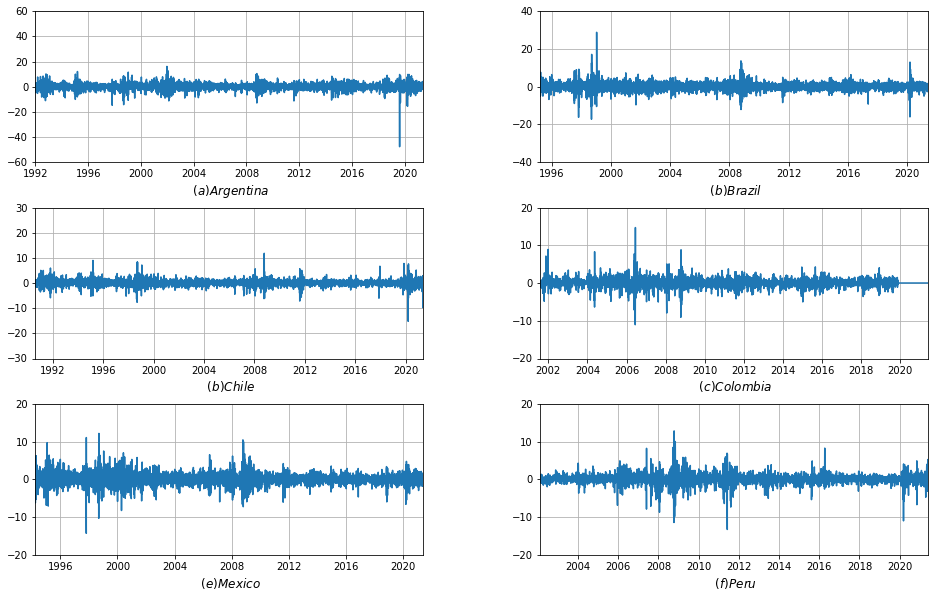

In [ ]:
def graph_ret(ts, country_name):
  
  nrows = np.ceil(ts.shape[1] / 2).astype(int) # number of rows
  ncols = 2                                    # number of columns

  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  for col, ax in zip(ts.columns, axes.flatten()):

    # convert to list
    val=ts[col].tolist()
    t=ts.index.tolist()

    # clean nan values
    cleanedList = []
    timeList = []
    for i in range(len(val)):
      if math.isnan(val[i])!=True:
        cleanedList.append(val[i])
        timeList.append(t[i])
    # graph    
    ax.plot(timeList, cleanedList)

    # vertical limits
    maxL = max(cleanedList)
    minL = min(cleanedList)
    rang = 0
    if (abs(maxL)>abs(minL)):
      rang = abs(maxL)
    else:
      rang = abs(minL)
    A = round(rang/10.0)*10+10
    ax.set_ylim([-A, A])

    # horizontal limits
    ax.set_xlim([timeList[0],timeList[-1]])

    # label
    ax.set_xlabel(" $\it{"+country_name[ts.columns.get_loc(col)]+"}$", fontname= 'Times New Roman', fontsize=12) 
    ax.grid()


# graph_ret function call for returns
print('Daily Latam Stock Market Returns Figure.')
country_name = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', '(e) Mexico', '(f) Peru']
graph_ret(logret_series, country_name)

## **Others**

### Unit root tests



The [arch](https://arch.readthedocs.io/en/latest/index.html) library from Sheppard (2021) is used.

The null hypothesis of the Phillips-Perron (PP) test is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then the null cannot be rejected that there and the series appears to be a unit root.

#### Augmented Dickey-Fuller unit root test
Parameters are `lags`, `trend` ('n', 'c', 'ct'), `max_lags` and `method` ('AIC', BIC', t-stat').

In [ ]:
def adf_test(ts, country_name):

  adf = ADF(ts.iloc[:,0].dropna(), trend = 'c', method = 'AIC')
  print('Augmented Dickey-Fuller unit root test')
  print('======================================')
  print('trend:                 ', adf.trend)
  print('Null Hypothesis:       ', adf.null_hypothesis)
  print('Alternative Hypothesis:', adf.alternative_hypothesis)
  print('')

  for i in range(ts.shape[1]):

    adf = ADF(ts.iloc[:,i].dropna(), trend = 'c', method = 'AIC')
    
    print('For', country_name[i])
    print('------------------------')
    print('test statistic:', round(adf.stat,4))
    print('p-value:        ', adf.pvalue)
    print('lags:           ', adf.lags)
    print('critical values:', adf.critical_values)
    print('------------------------')
    print('')


# adf_test() function call for returns
adf_test(logret_series, country_name)

#### Phillips-Perron unit root test
Parameters are `lags`, `trend` ('n', 'c', 'ct') and `test_type` ('tau, 'rho') where 'tau' is based on the t-stat and 'rho' uses a test based on nobs times the re-centered regression coefficient.

In [ ]:
def pp_test(ts, country_name):

  pp = PhillipsPerron(ts.iloc[:,0].dropna(), trend = 'c')
  print('Phillips-Perron unit root test')
  print('======================================')
  print('trend:                 ', pp.trend)
  print('Null Hypothesis:       ', pp.null_hypothesis)
  print('Alternative Hypothesis:', pp.alternative_hypothesis)
  print('')

  for i in range(ts.shape[1]):

    pp = PhillipsPerron(ts.iloc[:,i].dropna(), trend = 'c')
    
    print('For', country_name[i])
    print('------------------------')
    print('test statistic:', round(adf.stat,4))
    print('p-value:        ', pp.pvalue)
    print('lags:           ', pp.lags)
    print('critical values:', pp.critical_values)
    print('------------------------')
    print('')

# pp_test() function call for returns
pp_test(logret_series, country_name)

### Daily Latam Stock Market Prices Figure.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Daily Latam Stock Market Prices Figure.


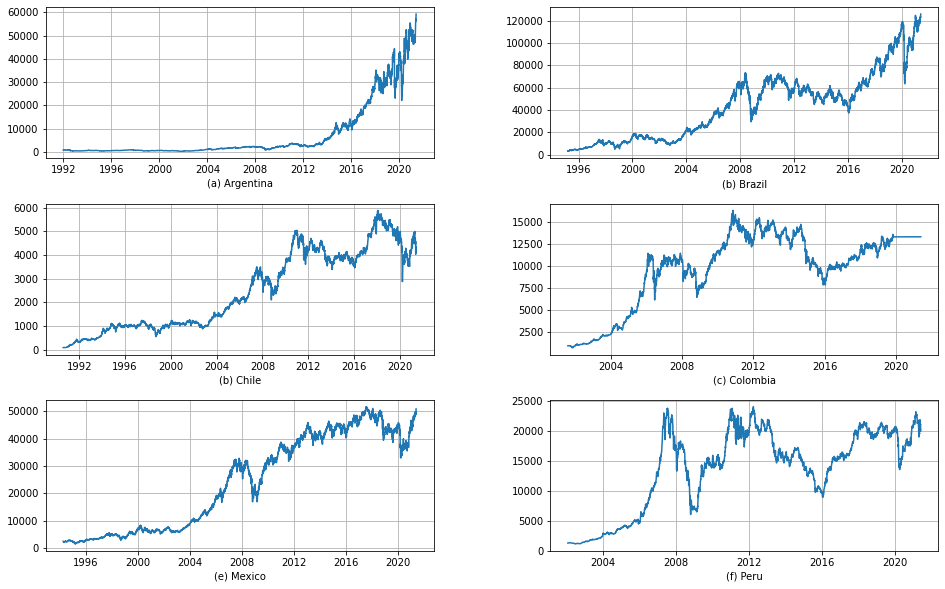

In [ ]:
def graph_price(ts, country_name):

  nrows = np.ceil(ts.shape[1] / 2).astype(int) # number of rows
  ncols = 2                                    # number of columns

  fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  for col, ax in zip(ts.columns, axes.flatten()):
    ax.plot(ts.index, ts[col])
    ax.set_xlabel(country_name[ts.columns.get_loc(col)], fontname= 'Times New Roman')
    ax.grid()

# graph_price function call for returns
print('Daily Latam Stock Market Prices Figure.')
country_name = ['(a) Argentina', '(b) Brazil', '(b) Chile', '(c) Colombia', '(e) Mexico', '(f) Peru']
graph_price(series, country_name)

### Descriptive Statistics for Stock Markets Prices.

In [ ]:
# descriptive_stats function call for prices
print('Descriptive Statistics for Stock Markets Prices')
print('')
descriptive_stats(series)

### Jarque–Bera test [Developing]

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. 
The null hypothesis for the test is that the data is normally distributed; the alternate hypothesis is that the data does not come from a normal distribution.

In [ ]:
from scipy import stats
stats.jarque_bera(logret_series.iloc[:,1].dropna())

(55502.714555763116, 0.0)

### Returns distributions [Developing]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


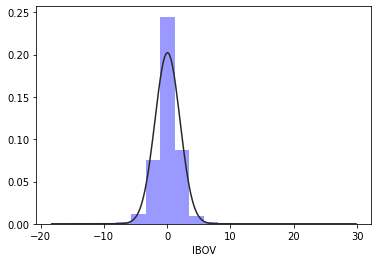

In [ ]:
from scipy.stats import norm
import seaborn as sns
sns.distplot(logret_series.iloc[:,1].dropna(),
             bins = 20,
             fit = norm, 
             kde = False, 
             hist=True,
             color='b')